# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
fitbit = pd.read_csv(r"C:\Users\chiin\Desktop\Ironhack\Laboratorios\5.2-lab_matplotlib_seaborn\data\Fitbit2.csv")

fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [3]:
# AVERAGE STEPS BY MONTH_ENCODED
fitbit.groupby('Months_encoded')['Steps'].median()

Months_encoded
1     10366.0
2      9235.0
3     11122.0
4     13846.5
5     11998.0
6     12935.5
7     10644.0
8     12213.0
9      9343.0
10     7865.0
11     9453.5
12     8531.0
Name: Steps, dtype: float64

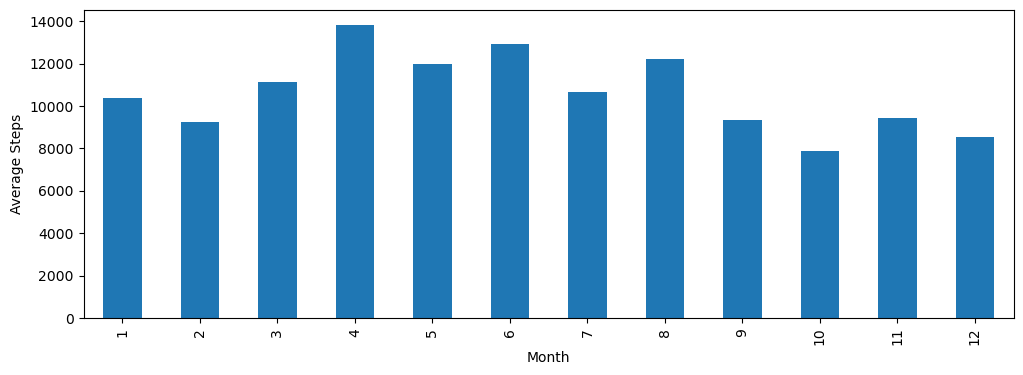

In [4]:
avg_month = fitbit.groupby('Months_encoded')['Steps'].median().plot(kind='bar',
                                                      figsize=(12, 4)                                                    
                                                     )
avg_month.set_xlabel('Month')

avg_month.set_ylabel('Average Steps')    

plt.savefig(r'C:\\Users\\chiin\\Desktop\\Ironhack\\Laboratorios\\5.2-lab_matplotlib_seaborn\\figures\\avg_month.png')

In [5]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
fitbit.groupby('Work_or_Weekend')['Steps'].median()

Work_or_Weekend
0     9998.0
1    10445.5
Name: Steps, dtype: float64

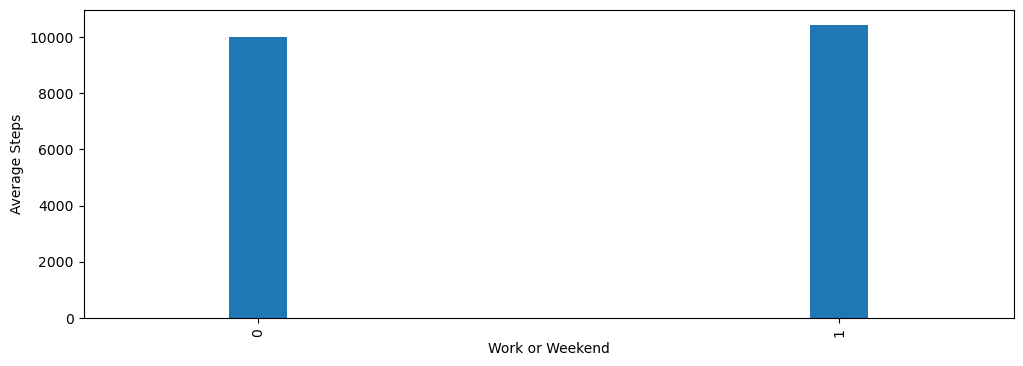

In [6]:
avg_work = fitbit.groupby('Work_or_Weekend')['Steps'].median().plot(kind='bar',
                                                      figsize=(12, 4),
                                                      width=0.1
                                                     )
avg_work.set_xlabel('Work or Weekend')

avg_work.set_ylabel('Average Steps')    

plt.savefig(r'C:\\Users\\chiin\\Desktop\\Ironhack\\Laboratorios\\5.2-lab_matplotlib_seaborn\\figures\\avg_work.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

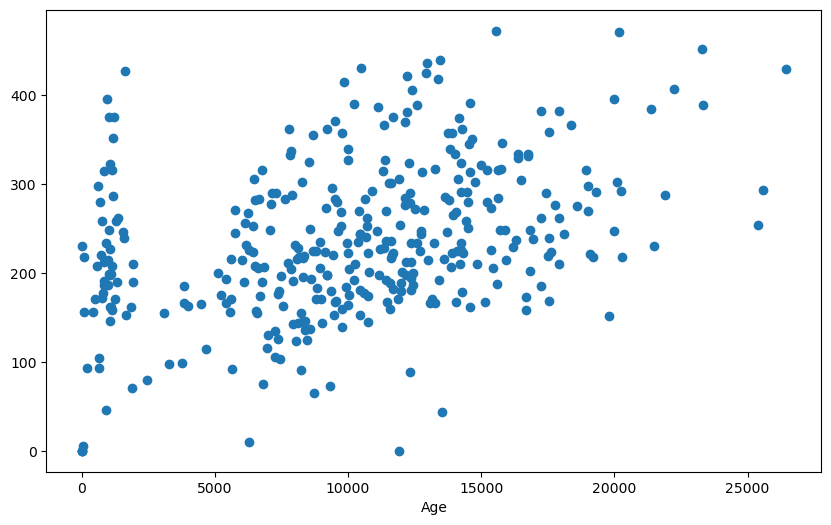

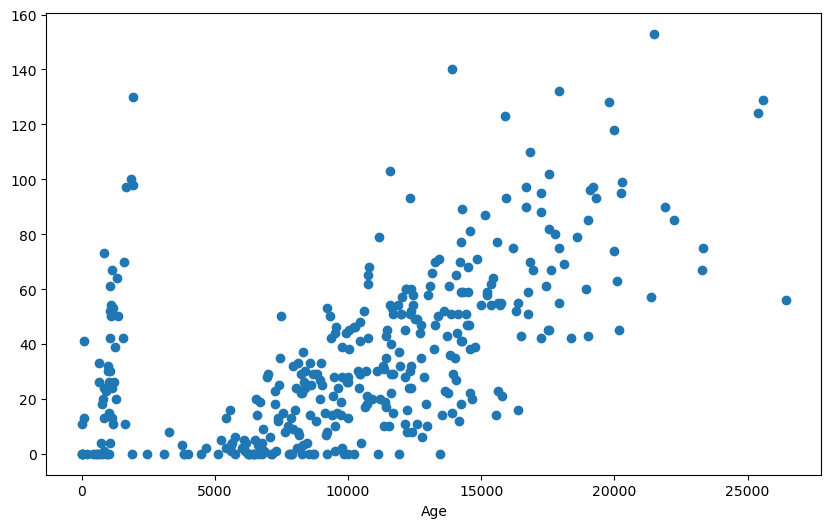

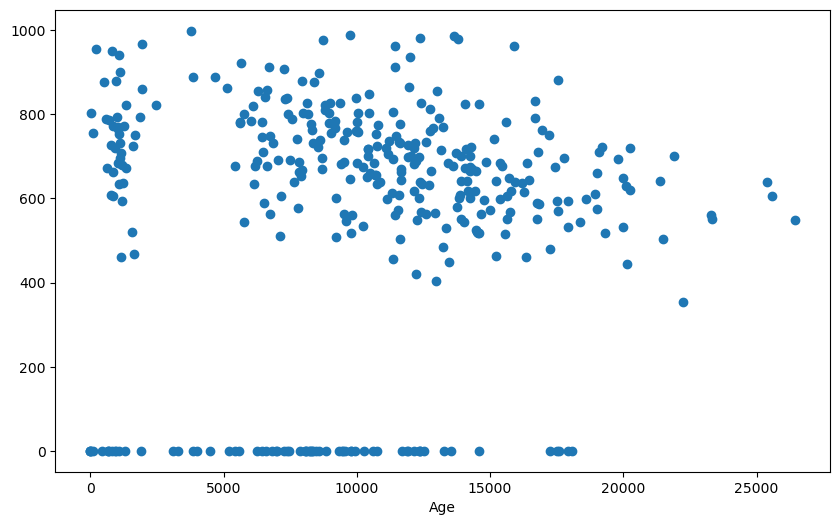

In [7]:
a = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for i, a in enumerate(a):  
    
    plt.figure(figsize=(10,6))
    
    plt.scatter(fitbit['Steps'], fitbit[a])
    
    plt.xlabel('Age')

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [8]:
titanic = pd.read_csv(r"C:\Users\chiin\Desktop\Ironhack\Laboratorios\5.2-lab_matplotlib_seaborn\data\titanic.csv")

titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [9]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [10]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=['int64', 'float64']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [11]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=['object']).columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [12]:
# your code here
plt.style.use('classic')


plt.rcParams['figure.figsize']=(12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

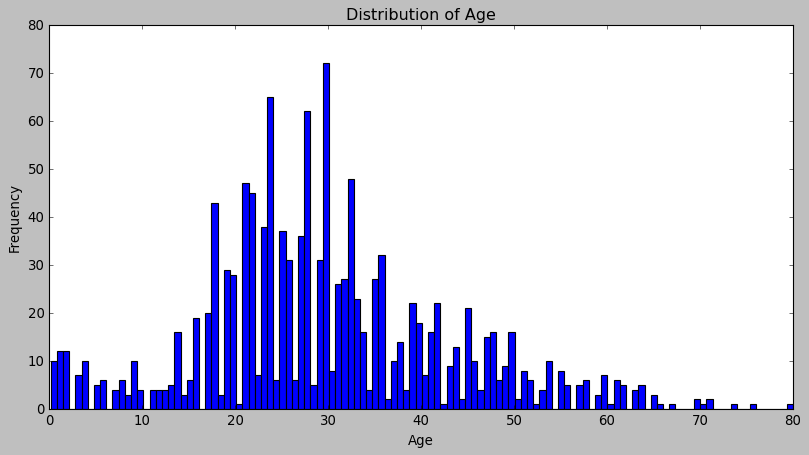

In [13]:
plt.style.use('classic')

plt.figure(figsize=(12,6))

plt.hist(titanic['Age'], bins=120)

plt.xlabel('Age')

plt.ylabel('Frequency')

plt.title('Distribution of Age');

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

(array([ 22.,  19.,  10.,  11.,  10.,  13.,   8.,   8.,  23.,  26.,  20.,
         75.,  29.,  93., 109.,  43.,  72.,  68., 111.,  53.,  71.,  47.,
         35.,  24.,  43.,  26.,  29.,  15.,  35.,  31.,  15.,  26.,   7.,
         14.,  13.,   5.,   9.,   8.,  11.,   9.,   3.,   2.,   0.,   2.,
          3.,   0.,   1.,   1.,   0.,   1.]),
 array([ 0.17  ,  1.7666,  3.3632,  4.9598,  6.5564,  8.153 ,  9.7496,
        11.3462, 12.9428, 14.5394, 16.136 , 17.7326, 19.3292, 20.9258,
        22.5224, 24.119 , 25.7156, 27.3122, 28.9088, 30.5054, 32.102 ,
        33.6986, 35.2952, 36.8918, 38.4884, 40.085 , 41.6816, 43.2782,
        44.8748, 46.4714, 48.068 , 49.6646, 51.2612, 52.8578, 54.4544,
        56.051 , 57.6476, 59.2442, 60.8408, 62.4374, 64.034 , 65.6306,
        67.2272, 68.8238, 70.4204, 72.017 , 73.6136, 75.2102, 76.8068,
        78.4034, 80.    ]),
 <BarContainer object of 50 artists>)

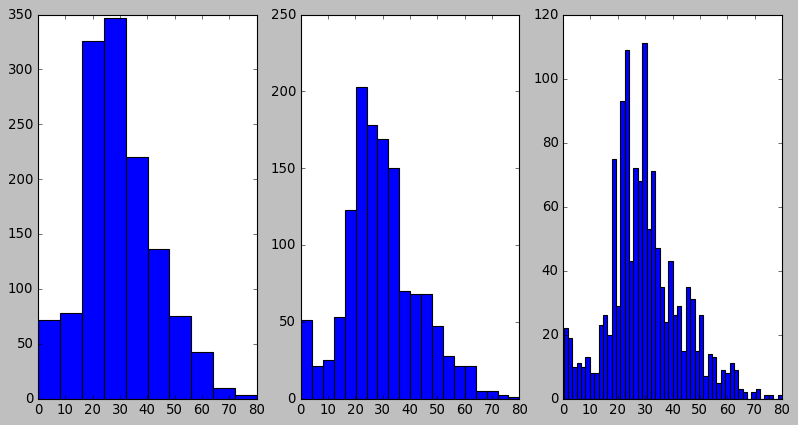

In [14]:
fig, axes = plt.subplots(1,3, figsize=(12,6))

plt.style.use('classic')

axes[0].hist(titanic.Age, bins = 10)

axes[1].hist(titanic.Age, bins = 20)

axes[2].hist(titanic.Age, bins = 50)

#### How does the bin size affect your plot?

In [15]:
"""
Si el bin es muy bajo, se superponen algunas barras del histograma y no ves el dato con exactitud
"""

'\nSi el bin es muy bajo, se superponen algunas barras del histograma y no ves el dato con exactitud\n'

#### Use seaborn to show the distribution of column `Age`.

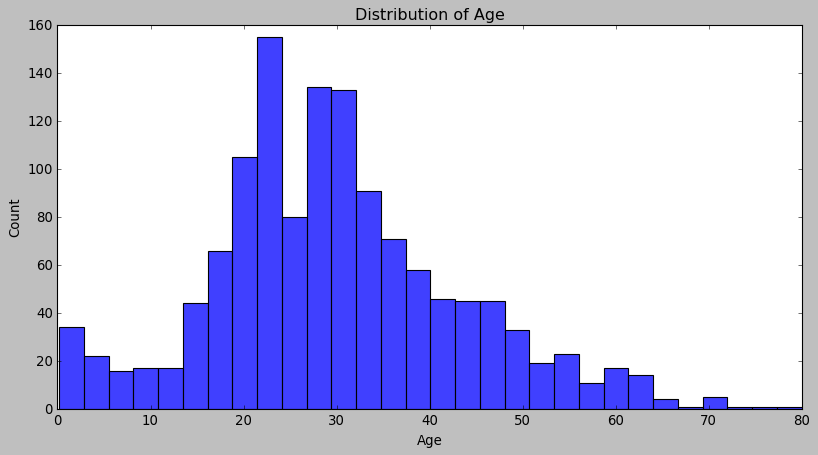

In [16]:
plt.figure(figsize=(12,6))

sns.histplot(x=titanic.Age)

plt.xlabel('Age')

plt.ylabel('Count')

plt.title('Distribution of Age');

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

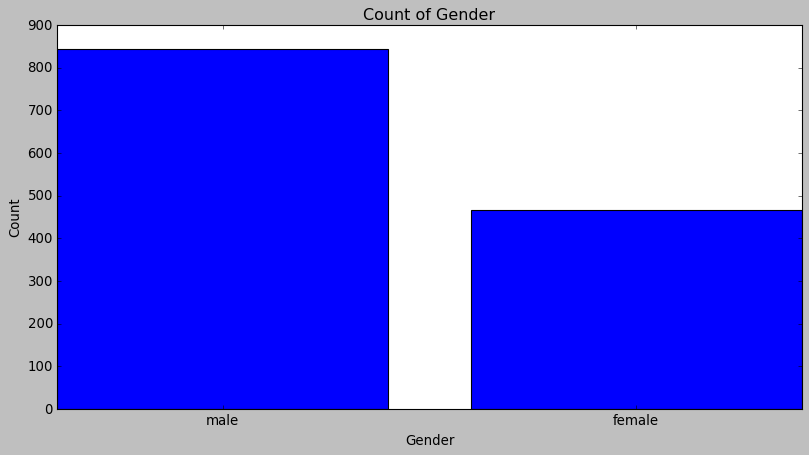

In [17]:
# Method 1 - matplotlib

plt.figure(figsize=(12,6))

plt.bar(titanic['Gender'].value_counts().index, titanic['Gender'].value_counts().values)

plt.xlabel('Gender')

plt.ylabel('Count')

plt.title('Count of Gender');

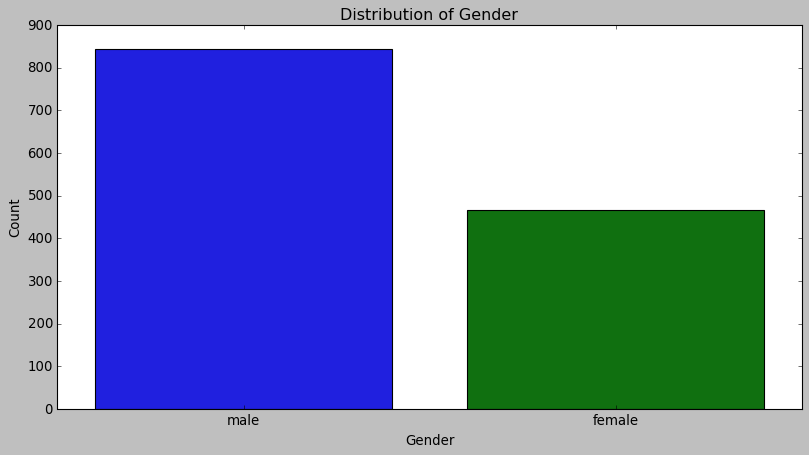

In [18]:
# Method 2 - seaborn
plt.figure(figsize=(12,6), )

sns.countplot(x=titanic.Gender)

plt.xlabel('Gender')

plt.ylabel('Count')

plt.title('Distribution of Gender');

#### Use the right plot to visualize the column `Pclass`.

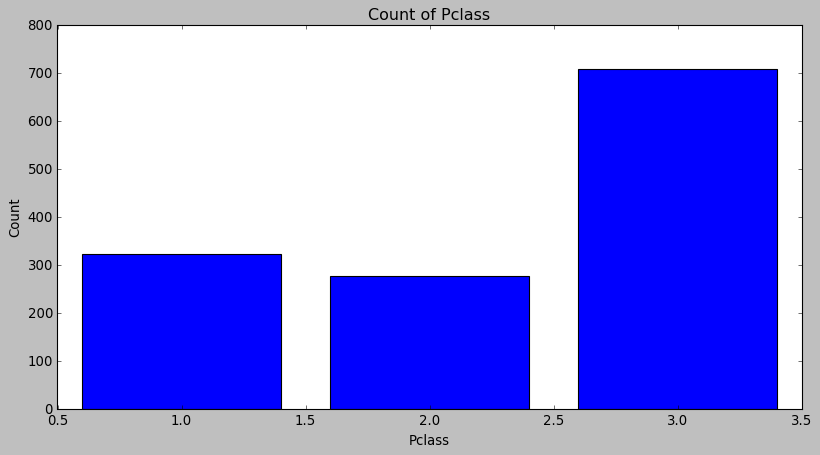

In [19]:
# your code here
plt.figure(figsize=(12,6))

plt.bar(titanic['Pclass'].value_counts().index, titanic['Pclass'].value_counts().values)

plt.xlabel('Pclass')

plt.ylabel('Count')

plt.title('Count of Pclass');

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

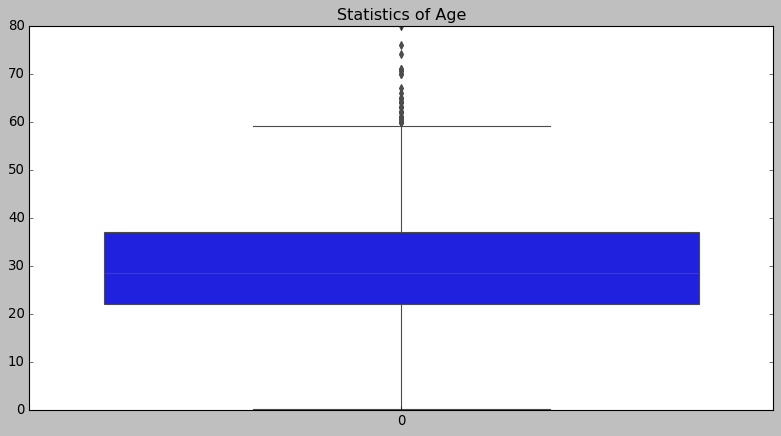

In [20]:
# your code here

plt.figure(figsize=(12,6))

sns.boxplot(titanic.Age)

plt.title('Statistics of Age');

#### What does the last plot tell you about the feature `Age`?

In [21]:
"""
La mayoria de la gente podemos ver que se encuentra entre 20 y 40 años, y a partir de los 60 años, esos datos son considerados outliers
"""

'\nLa mayoria de la gente podemos ver que se encuentra entre 20 y 40 años, y a partir de los 60 años, esos datos son considerados outliers\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

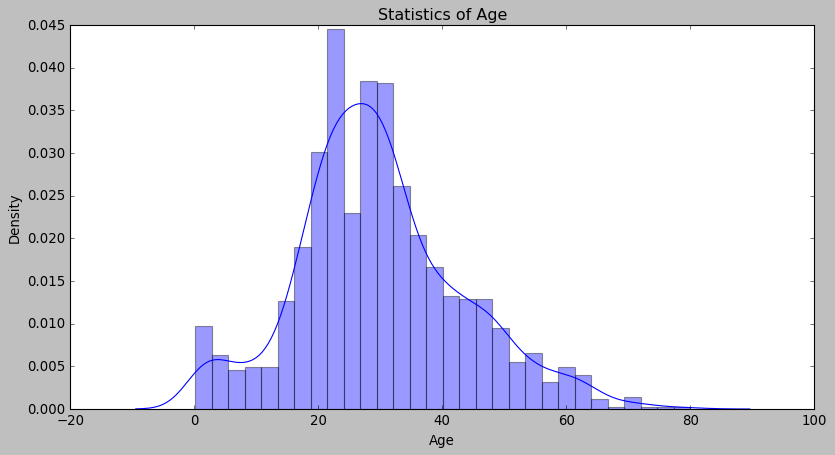

In [22]:
# your code here
plt.figure(figsize=(12,6))

sns.distplot(titanic.Age)

plt.title('Statistics of Age');

#### What additional information does the last plot provide about feature `Age`?

In [23]:
"""
El mayor número de personas de la misma edad esta cerca a 20
"""

'\nEl mayor número de personas de la misma edad esta cerca a 20\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

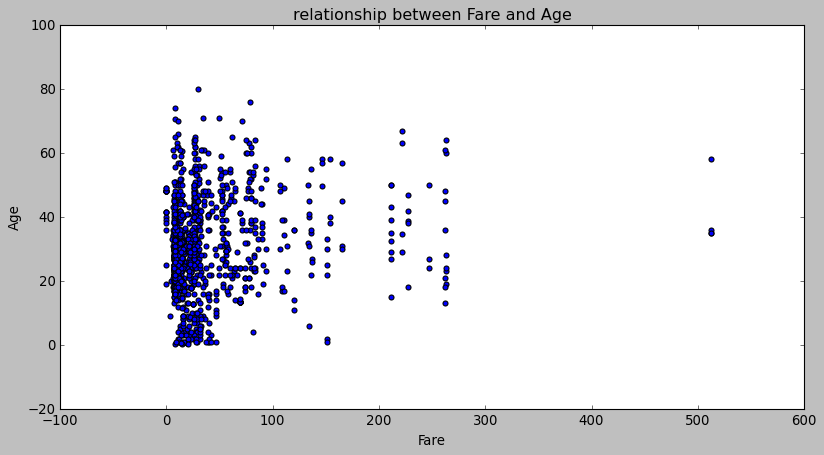

In [24]:
# Method 1 - matplotlib

plt.figure(figsize=(12,6))

plt.scatter(x=titanic.Fare,y= titanic.Age)

plt.xlabel('Fare')

plt.ylabel('Age')

plt.title('relationship between Fare and Age');

<Axes: xlabel='Fare', ylabel='Age'>

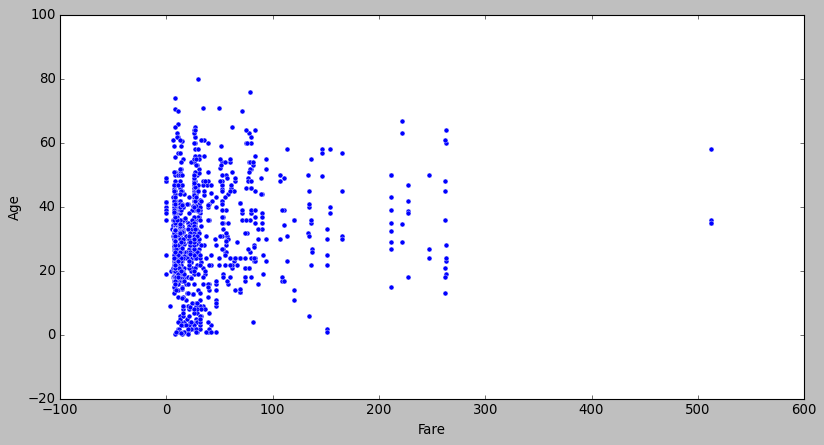

In [25]:
# Method 2 - seaborn

plt.figure(figsize=(12,6))

sns.scatterplot(x=titanic.Fare,y= titanic.Age)

#### Plot the correlation matrix using seaborn.

In [26]:
# your code here

titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


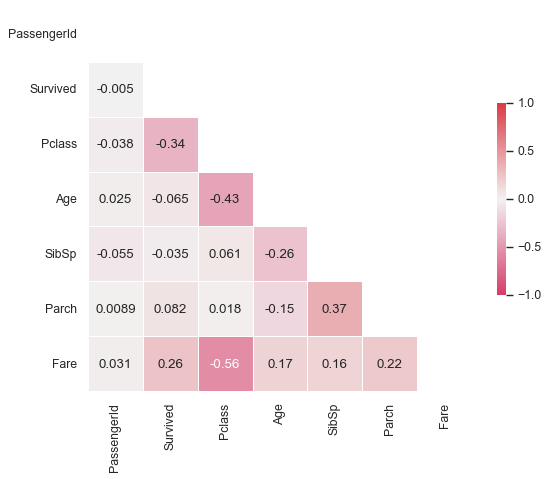

In [27]:
sns.set(style='white')     # estilo blanco

mascara = np.triu(np.ones_like(titanic.corr(), dtype=bool))   # mascara

cmap = sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


sns.heatmap(titanic.corr(),          # datos
            mask=mascara,  # mascara
            cmap=cmap,     # paleta de colores
            vmax=1,           # maximo vertical
            vmin=-1,          # minimo vertical
            center=0,         # centro
            square=True,      # cuadrado el dato pintado
            linewidth=0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True                 # anotacion, el numero escrito
           );

#### What are the most correlated features?

In [28]:
"""
Fare y Pclass
"""

'\nFare y Pclass\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

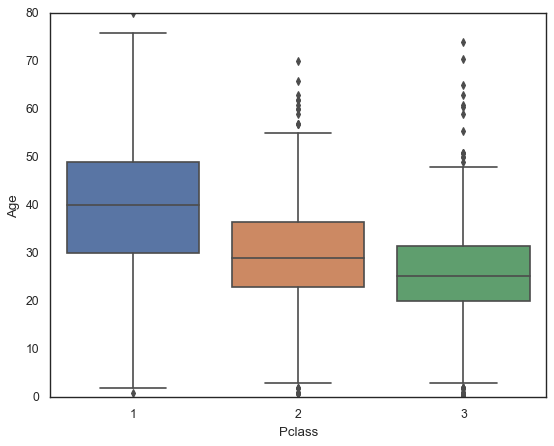

In [29]:
# your code here

sns.boxplot(x='Pclass', y='Age', data=titanic);



#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

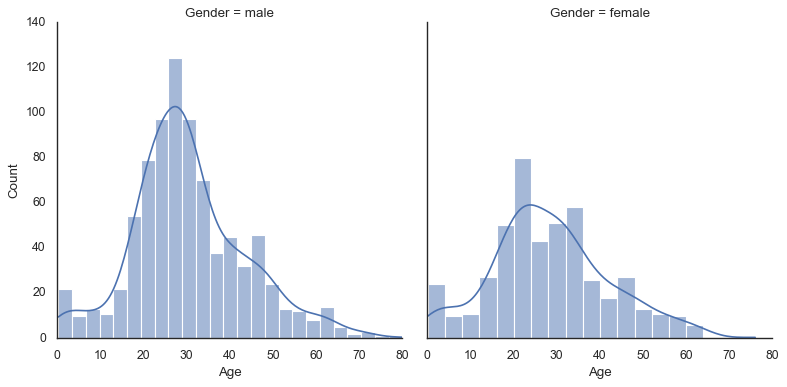

In [30]:
# your code here

sns.FacetGrid(titanic, col='Gender', height=5).map(sns.histplot, 'Age', kde=True)